### 레이블 개수 확인

In [181]:
# 레이블 부족 문제 다루기
# 예시 깃허브 이슈 테이커 만들기
# 데이터 준비하기
import pandas as pd

dataset_url = "/content/drive/MyDrive/Colab Notebooks/PhishingDataConcat.json"
df_issues = pd.read_json(dataset_url, lines = True)
print(f"데이터프레임 크기: {df_issues.shape}")

데이터프레임 크기: (1, 21579)


- 원소가 객체 형식이라 데이터프레임으로 변경

In [182]:
df_issues = df_issues.T

In [183]:
df_issues

,0
0,{'text': ' 사기범: 저희 햇살론 특성상 네네네 채무가 3개월 이상 이제 쓰...
1,{'text': ' 피해자: 여보세요 사기범: 예 여보세요 고객님 맞으시죠? 네 전...
2,{'text': ' 사기범: 말씀 알아보시고 연락 주시면 안 되실까요? 제가 다시 ...
3,{'text': ' 사기범: 여보세요 사기범: 네네 피해자: 이민혁 씨 좀 부탁드릴...
4,{'text': ' 사기범: 고객님께 송금을 하기 전에 저희는 여신금융협회에 다 신...
...,...
21574,{'text': ' 토론자: &company-name46&가 외환카드 노동자를 해고...
21575,{'text': ' 사회자: 네 그러니까 이게 영화가 저는 현실감이 많이 포함 됐다...
21576,{'text': ' 토론자: 이런걸 보면 몇 천년간 이어진 양반 천민의 구분이 쉽게...
21577,{'text': ' 토론자: 그리고 천구백오십팔 년을 기점으로 미국의 무상원조가 적...


In [184]:
for i in range(len(df_issues)):
  if i == 0:
    df = pd.DataFrame({key: pd.Series(val) for key, val in df_issues[0][i].items()})
    continue
  df2 = pd.DataFrame({key: pd.Series(val) for key, val in df_issues[0][i].items()})
  df = pd.concat([df, df2], axis=0)
print(type(df))
# print(df)

<class 'pandas.core.frame.DataFrame'>


In [185]:
df

,text,index,label
0,사기범: 저희 햇살론 특성상 네네네 채무가 3개월 이상 이제 쓰셔야 햇살론 진행이...,2,1
0,피해자: 여보세요 사기범: 예 여보세요 고객님 맞으시죠? 네 전화드렸던 김우석 대...,3,1
0,사기범: 말씀 알아보시고 연락 주시면 안 되실까요? 제가 다시 붙잡고 있을 수는 ...,4,1
0,사기범: 여보세요 사기범: 네네 피해자: 이민혁 씨 좀 부탁드릴게요. 사기범: 네...,5,1
0,사기범: 고객님께 송금을 하기 전에 저희는 여신금융협회에 다 신고를 해요.현대캐피...,6,1
...,...,...,...
0,토론자: &company-name46&가 외환카드 노동자를 해고를 할 때 누구를 ...,257239,0
0,사회자: 네 그러니까 이게 영화가 저는 현실감이 많이 포함 됐다고 생각해요 그런 ...,257256,0
0,토론자: 이런걸 보면 몇 천년간 이어진 양반 천민의 구분이 쉽게 없어지지 않았죠....,257274,0
0,토론자: 그리고 천구백오십팔 년을 기점으로 미국의 무상원조가 적어지며 무상원조는 ...,257293,0


In [186]:
len(df)

21579

In [187]:
# 레이블 개수 확인
df["label"].value_counts().to_frame().T


,0,1
label,21401,178


In [188]:
# index 재설정
df.reset_index(drop=True, inplace = True)

In [189]:
# 데이터 하나 확인
for column in ["text", "index", "label"]:
    print(f"{column}: {df[column].iloc[0]}\n")

text:  사기범: 저희 햇살론 특성상 네네네 채무가 3개월 이상 이제 쓰셔야 햇살론 진행이 가능하시거든요.네네 이제 삼 개월 치 안 되시는 이제 채무가 있으셔서 이 부분에 이제 문제가 생기신 겁니다.이제 어떻게 이제 이제 저축은행 같은 경우는요 이제 이쪽을 이제 저 이제 정리를 해주시고 저희 쪽 자금을 받아보시는 건 어떻겠어요 고객님 사기범: 어떻게 이제 고객님이 이쪽을 정리해 주신다 하시면 저희 쪽에서 바로 진행 가능하시고 이제 오늘 안으로 이제 바로 송금 가능하시니까 피해자: 일단은 그걸 해결을 해야지. 사기범: 네네네 근데 이제 저축은행이잖아요. 네 이쪽에서 이제 한 군데만 이제 정리를 하셔도 저희 쪽에서 자금이 나가거든요.제가 말씀드리는 거는 한 군데만 정리하셔도 이제 저축은행이 저희 쪽으로 이제 대출이 가능하시다고 말씀을 드리는 거예요.

index: 2

label: 1



In [190]:
# 중복된 데이터를 삭제
len_before = len(df)
df = df.drop_duplicates(subset="text")
print(f"삭제된 중복 이슈: {(len_before-len(df))/len_before:.2%}")

삭제된 중복 이슈: 0.14%


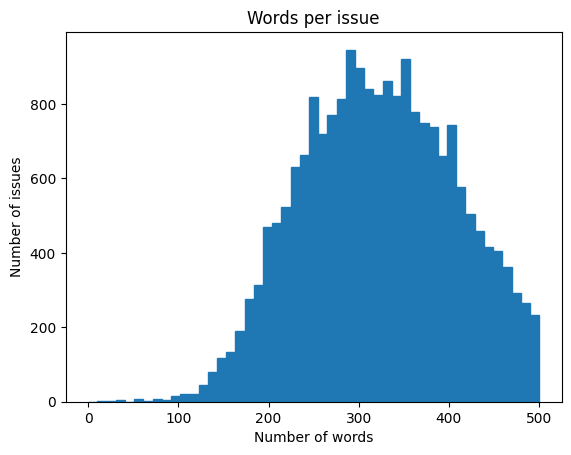

In [191]:
# 텍스트의 단어 개수를 살펴봄
import numpy as np
import matplotlib.pyplot as plt

(df["text"].str.split().apply(len)
 .hist(bins=np.linspace(0, 500, 50), grid=False, edgecolor="C0"))
plt.title("Words per issue")
plt.xlabel("Number of words")
plt.ylabel("Number of issues")
plt.show()

### 훈련 세트 나누기

In [ ]:
# 훈련 세트 만들기
# MultiLabelBinarizer 클래스 : 레이블 이름의 리스트를 받고 레이블에 해당하는 위치는 1, 나머지는 0인 벡터를 만듦
# 본 과정에서는 label이 문자열이 아니고 multi label도 아니라 특별히 필요 없음
# from sklearn.preprocessing import MultiLabelBinarizer
# all_labels = [0, 1]
# mlb = MultiLabelBinarizer()
# mlb.fit([all_labels])
# mlb.transform([[1], [0]])


array([[0, 1],
       [1, 0]])

In [192]:
!pip install scikit-multilearn

In [198]:
# 데이터 세트를 지도 학습 데이터셋과 비지도 학습 데이터셋으로 분할 iterative_train_test_split()
# iterative_train_test_split(X, y, test_size) : 	return = X_train, y_train, X_test, y_test
# balanced_split() 함수로 지도 학습 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 균형있게 나눈다.
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import train_test_split

# np.expand_dims(arr, axis) = arr: 차원을 확장할 배열, axis: 새로 추가될 차원의 위치 , axis=0 이면 0차원 앞에 1이 추가됨
# ind : 임의로 데이터셋을 나누기 위한 인덱스를 만든다.
# df.iloc[ind_train[:, 0]] = train data에서 1열 = text만 df에서 추출
def balanced_split(df, test_size=0.5):
  ind = np.expand_dims(np.arange(len(df)), axis=1) # format : (len(df),1)
  # labels = mlb.transform(df["label"])
  # label을 .reshape(-1,1)로 형식을 맞춰줘야 함
  # series라 .values를 넣어줌
  labels = df["label"].values.reshape(-1,1)
  ind_train, _ , ind_test , _ = train_test_split(ind, labels, test_size)
  return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]


- 함수로 돌리면 안되서 내용물 빼서 돌림
- train valid test split

In [208]:
from sklearn.model_selection import train_test_split
# reset_index : 설정 인덱스를 해제
# df_unsup  : 고려하지 않는 레이블링 된 데이터  = 희소 레이블 데이터
# df_clean = df[["text", "label", "index"]].reset_index(drop=True).copy()
# df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]
# df_sup = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

# np.random.seed(0)
# train : valid : test = 8: 1: 1로 나눔

# labels = mlb.transform(df["label"])
# label을 .reshape(-1,1)로 형식을 맞춰줘야 함
# series라 .values를 넣어줌
ind = np.expand_dims(np.arange(len(df_clean)), axis=1) # format : (len(df),1)
labels = df_clean["label"].values.reshape(-1,1)
ind_train, _ , ind_test , _ = train_test_split(ind, labels, test_size=0.2)
df_train  = df_clean.iloc[ind_train[:, 0]]
df_tmp = df_clean.iloc[ind_test[:,0]]

# df_train, df_tmp = balanced_split(df_clean, test_size= 0.2)
# df_valid, df_test = balanced_split(df_tmp, test_size =0.5)

In [209]:
ind = np.expand_dims(np.arange(len(df_tmp)), axis=1) # format : (len(df),1)
labels = df_tmp["label"].values.reshape(-1,1)
ind_train, _ , ind_test , _ = train_test_split(ind, labels, test_size=0.5)
df_valid  = df_tmp.iloc[ind_train[:, 0]]
df_test = df_tmp.iloc[ind_test[:,0]]


### DatasetDict 객체로 만듦

In [206]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.3 MB/s eta 0:00:00


In [211]:
# DatasetDict 객체로 만듦
from datasets import Dataset, DatasetDict
# from_pandas() : 판다스 DataFrame에서 각 분할을 바로 Dataset으로 로드
ds = DatasetDict({
    "train" : Dataset.from_pandas(df_train.reset_index(drop=True)),
    "valid" : Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test" : Dataset.from_pandas(df_test.reset_index(drop=True)),
})


In [ ]:
# # 훈련 슬라이스를 만들기
# # 즉, train sample을 또 나눈다.
# np.random.seed(0)
# all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
# indices_pool = all_indices
# labels = mlb.transform(ds["train"]["labels"])
# # labels = mlb.transform(ds["train"]["labels"])
# train_samples = [8, 16, 32, 64, 128]
# train_slices, last_k = [], 0
# # test_size = test의 비율 : (k-last_k)/len(labels) = 레이블 당 데이터 개수
# for i, k in enumerate(train_samples):
#     # 다음 슬라이스 크기를 채우는데 필요한 샘플을 분할합니다
#     indices_pool, labels, new_slice, _ = iterative_train_test_split(
#         indices_pool, labels, (k-last_k)/len(labels))
#     last_k = k
#     if i==0: train_slices.append(new_slice)
#     else: train_slices.append(np.concatenate((train_slices[-1], new_slice)))

# train_slices.append(all_indices), train_samples.append(len(ds["train"]))

# # np.squeeze :크기가 1인 차원을 없앤다.
# train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

In [ ]:
# print("목표 분할 크기:")
# print(train_samples)
# print("실제 분할 크기:")
# print([len(x) for x in train_slices])

### Data Augmentation

In [212]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00


In [ ]:
# data augmentation 기법
# 1. 역 번역 : 원본 언어 -> 하나 이상의 타깃 언어(기계번역을 이용) -> 원본 언어로 번역
# 2. 토큰 섞기 : 텍스트에서 동의어 교체, 단어 추가, 교환, 삭제 등의 방법을 임의로 수행
# 역번역 : M2M100 , 토큰 섞기 : NlpAug, TextAttack 같은 라이브러리로 구현 가능
# 토큰섞기에서 동의어 변환을 이용
from transformers import set_seed
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

set_seed(3)
text = "Even if you defeat me Megatron, others will rise to defeat your tyranny"
augs = {}
augs["synonym_replace"] = naw.SynonymAug(aug_src='wordnet')
augs["random_insert"] = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="insert", aug_max=1)
augs["random_swap"] = naw.RandomWordAug(action="swap")
augs["random_delete"] = naw.RandomWordAug()
augs["bt_en_de"] = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
for k,v in augs.items():
    print(f"원본 텍스트: {text}")
    print(f"{k}: {v.augment(text)}")
    print("")

In [ ]:
from transformers import set_seed
import nlpaug.augmenter.word as naw

set_seed(3)
aug = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="substitute")

text = "Transformers are the most popular toys"
print(f"원본 텍스트: {text}")
print(f"증식된 텍스트: {aug.augment(text)}")

In [ ]:
def augment_text(batch, transformations_per_example=1):
    text_aug, label_ids = [], []
    for text, labels in zip(batch["text"], batch["label_ids"]):
        text_aug += [text]
        label_ids += [labels]
        for _ in range(transformations_per_example):
            text_aug += aug.augment(text)
            label_ids += [labels]
    return {"text": text_aug, "label_ids": label_ids}

In [ ]:
for train_slice in train_slices:
    # 훈련 슬라이스와 테스트 데이터를 준비합니다
    ds_train_sample = ds["train"].select(train_slice)
    # 증식 결과를 펼쳐서 레이블에 정렬합니다!
    ds_train_aug = (ds_train_sample.map(
        augment_text, batched=True, remove_columns=ds_train_sample.column_names)
                    .shuffle(seed=42))
    y_train = np.array(ds_train_aug["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # 간단한 CountVectorizer를 사용해 텍스트를 토큰 카운트로 인코딩합니다
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_aug["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # 모델을 만들고 훈련합니다!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # 예측을 생성하고 평가합니다
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # 평가 결과를 저장합니다
    macro_scores["Naive Bayes + Aug"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes + Aug"].append(clf_report["micro avg"]["f1-score"])

### 시각화하기

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run,
                     linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run,
                     linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes + Aug")
